# Assignment 2

Read all instructions carefully

## Work Requirements

- You must work on Assignment 2 alone. You may not work with partners.
- You may use online resources (Stack Exchange, Googling, Regex cheat sheets), including documentation and everything on Canvas. However, you may not use an LLM (ChatGPT, Copilot, etc)
- Lightly document your code, especially any decisions you make along the way. You do not need extensive documentation. You do **NOT** need a separate README file. But a person should be able to read your submission top to bottom and understand what you're doing.

## Submission Instructions

- This assignment is due on **Monday, October 6 at 6:59pm**.
- The assignment must be submitted on Canvas as a single PDF file together with a requirements.txt file (as a text file, not PDF). The two files must be submitted as separate files, not as a zip file.
- The PDF file you submit must be named with the following format "lastname_firstname_assignment2.pdf"
- The requirements.txt file should only include the libraries you need to run your code in a Jupyter notebook, with their versions properly specified (e.g., use pip freeze with your venv activated)

## Recommendations and Resources

**Recommendation:** Complete the assignment in a Jupyter notebook, and then convert the notebook to a PDF. If you have too much trouble converting to PDF, then convert it to HTML, open it as HTML and export that page to PDF (but this is a less preferred option).

**Recommendation:** As always, start by examining the data you read in and understand it. What does each row represent in each dataframe?

**Helpful Documentation:**
- Pandas expanding: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding
- Python re library for Regex: https://docs.python.org/3/library/re.html
- Pareto: https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html#numpy.random.pareto
- Gaussian: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
- Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Seaborn Scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Matplotlib scatterplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- Matplotlib boxplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#

# Part 0 - Imports and CoW

In [91]:
# Import libraries
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import re
from datetime import datetime
from matplotlib import pyplot as plt

In [92]:
# Enforce Copy-on-Write
pd.options.mode.copy_on_write = True

# Part 1 - Regex, EDA, and Visualization

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [93]:
#Load the datasets into Pandas DataFrames
def load_dataset_to_df(file, na_values = None):
    cwd = Path.cwd()
    assignment2 = cwd.parent
    data = assignment2.joinpath('data')
    path = data.joinpath(file)
    if path.exists():
        print(f'Found the data file {path}')
    else:
        raise Exception('Could not find that file', path)
    return pd.read_csv(path, na_values = na_values)

bus_df = load_dataset_to_df('bus.csv', na_values = [-9999])
ins_df = load_dataset_to_df('ins.csv')
isn2vio_df = load_dataset_to_df('ins2vio.csv')
vio_df = load_dataset_to_df('vio.csv')

Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025/Assignments/Assignment2/data/bus.csv
Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025/Assignments/Assignment2/data/ins.csv
Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025/Assignments/Assignment2/data/ins2vio.csv
Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025/Assignments/Assignment2/data/vio.csv


Use the business dataset (bus) to answer the first few questions below

1.1) Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

In [94]:
bus_df.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,NaN
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,NaN,NaN,1.415483e+10
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,NaN,NaN,1.415528e+10
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,NaN,NaN,1.415586e+10
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,NaN,NaN,1.415970e+10


Im not sure what is bid is as there's no column named that, but business id column seems like thats what bid may be so im going to use that. Im curious what -9999 and -9999.0 means, but since there no documentation I have decided to interpret it as a NaN

In [95]:
ID = "business id column"
NAME = "name"
ADDRESS = "address"
POSTAL_CODE = "postal_code"

In [96]:
bid_has_duplicates = bus_df[ID].nunique() < bus_df.shape[0]
if bid_has_duplicates:
    print(f'{ID} has a duplicate ID')
else:
    print(f'{ID} has no duplicate ID')


business id column has no duplicate ID


1.2) In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful.

In [97]:
top_names_df = bus_df[NAME].value_counts().sort_values(ascending=False).head(5).reset_index()
top_names_df

,name,count
0,Peet's Coffee & Tea,20
1,Starbucks Coffee,13
2,McDonald's,10
3,Jamba Juice,10
4,STARBUCKS,9


In [98]:
top_names = top_names_df[NAME].to_numpy()
top_names

array(["Peet's Coffee & Tea", 'Starbucks Coffee', "McDonald's",
       'Jamba Juice', 'STARBUCKS'], dtype=object)

In [99]:
top_addresses_df = bus_df[ADDRESS].value_counts().sort_values(ascending=False).head(5).reset_index()
top_addresses_df

,address,count
0,Off The Grid,39
1,428 11th St,34
2,2948 Folsom St,17
3,3251 20th Ave,17
4,Pier 41,16


In [100]:
top_addresses = top_addresses_df[ADDRESS].to_numpy()
top_addresses

array(['Off The Grid', '428 11th St', '2948 Folsom St', '3251 20th Ave',
       'Pier 41'], dtype=object)

1.3) Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [101]:
bus_df[POSTAL_CODE].unique()

array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', nan, '94107',
       '94105', '94108', '94117', '94158', '94112', '94127', '94105-1420',
       '94111', '94122', '94115', '94104', '94122-1909', '94131',
       '94117-3504', '94518', '95105', '94013', '94130', '941102019',
       '941', '941033148', 'CA', '92672', '94120', '94143', '94101',
       '94014', '94129', '94602', 'Ca', '94080', '00000', '94188',
       '64110', '94544', '94301', '94901', '95117', '95133', '95109',
       '95132', '95122', '94621', '94124-1917', '94102-5917',
       '94105-2907', '95112', '94123-3106'], dtype=object)

In [102]:
print(bus_df[POSTAL_CODE].value_counts().sort_values(ascending=True).to_string())

postal_code
94123-3106      1
94122-1909      1
94544           1
94901           1
95117           1
95133           1
95132           1
95109           1
95122           1
94621           1
94124-1917      1
94102-5917      1
94105-2907      1
95112           1
64110           1
00000           1
94117-3504      1
Ca              1
94602           1
94129           1
94014           1
94120           1
92672           1
941033148       1
941             1
941102019       1
94105-1420      1
95105           1
94080           1
94518           1
94188           2
CA              2
94013           2
94301           2
94101           2
94143           5
94130           8
94131          49
94127          67
94134          82
94158          90
94116          97
94132         132
94104         142
94121         157
94123         177
94117         189
94112         192
94114         200
94124         218
94108         229
94115         230
94118         231
94105         249
94122         25

The postal codes look suspicious:
1. NaN (-9999)
2. 94518
3. 95105
4. 94013
5. 941
6. CA
7. 92672
8. 94101
9. 94014
10. 94602
11. Ca
12. 00000
13. 94188
14. 64110
15. 94544
16. 94301
17. 94901
18. 95117
19. 95133
20. 95109
21. 95132
22. 95122
23. 94621
24. 95112

According to USPS, postal codes in
San Francisco, CA and South Francisco, CA are:
1. 94080
2. 94083
3. 94102 - 94112
4. 94114- 94134
5. 94137
6. 94139 - 94147
7. 94151
8. 94158 - 94161
9. 94163 - 94164
10. 94172
11. 94177

The pairs with a dash 'zipcode 1 - zipcode 2'
are interpolated for example 0-9 is 0,2,3,4,5,6,7,8,0
and one can use USPS tool below to verify these zip codes

https://tools.usps.com/zip-code-lookup.htm?bycitystate

and the 9 digit numbers seem to be "valid" as defined below

1. 94122-1909  -> 94122
2. 94124-1917 -> 94124
3. 94102-5917 -> 94102
4. 94105-1420 -> 94105
5. 94117-3504 -> 94117
6. 941033148 -> 94103
7. 941102019 -> 94110
8. 94105-2907 -> 94105
9. 94123-3106 -> 94123

From looking at bus_df from bus.csv, all rows say that the city is in San Francisco, however there some entries that have incorrect/invalid zip codes for San Francisco or South San Francisco, zip codes must be included in bullet points 1-11.

if the zip code is not numerical or doesnt contain at least 5 numbers or the first 5 digits are invalid San Francisco or South San Francisco
(excluded in bullet points 1-11),
then I will store None for postal5

if the zip code is numerical and contains at least 5 numbers and the first 5 digits San Francisco or South San Francisco is valid (included in bullet points 1-11),
 then I will keep the zip code for postal5
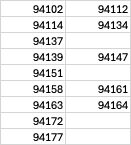
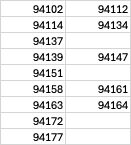
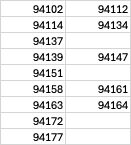
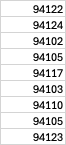

In [103]:
def is_valid(postal_code, pattern):
    if(len(str(postal_code)) >= 5) and re.fullmatch(pattern, postal_code[:5]):
        return postal_code[:5]
    else:
        return None

In [104]:
sf_postal_code_pattern = r'941(0[2-9]|1[^3]|2[0-9]|3[^5,6,8]|4[0-7]|5[1,8,9]|6[0,1,3]|7[2,7])|940(8[0,3])'
POSTAL5 = 'postal5'
bus_df[POSTAL5] = bus_df[POSTAL_CODE].map(lambda x: is_valid(x, sf_postal_code_pattern))

In [105]:
bus_df.head(5)

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,NaN,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,NaN,NaN,1.415483e+10,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,NaN,NaN,1.415528e+10,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,NaN,NaN,1.415586e+10,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,NaN,NaN,1.415970e+10,94124


Here we can we see that all of our values were mapped correctly based on the is_valid method

In [106]:
print(bus_df[POSTAL5].value_counts(dropna=False).sort_values(ascending=True).to_string())

postal5
94080      1
94120      1
94129      1
94143      5
94130      8
94131     49
94127     67
94134     82
94158     90
94116     97
94132    132
94104    142
94121    157
94123    178
94117    190
94112    192
94114    200
94124    219
None     222
94108    229
94115    230
94118    231
94105    251
94122    256
94111    259
94109    382
94133    398
94107    408
94102    457
94110    556
94103    563


Now using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

1.5) Create a side-by-side boxplot that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.

In [107]:
IID ='iid'
VID ='vid'
INNER = 'inner'
food_safety_df = ins_df.merge(isn2vio_df, on=IID, how=INNER).merge(vio_df, on=VID, how=INNER)
food_safety_df[ID] = food_safety_df[IID].str.split('_').str[0].astype('int64')
food_safety_df = food_safety_df.merge(bus_df, on=ID, how=INNER)
food_safety_df.head()

,iid,date,score,type,vid,description,risk_category,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,103105,Improper cooling methods,High Risk,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,NaN,NaN,1.415528e+10,94103
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,103139,Improper food storage,Low Risk,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,NaN,NaN,1.415528e+10,94103
2,100030_20190612,06/12/2019 12:00:00 AM,-1,New Ownership,103142,Unclean nonfood contact surfaces,Low Risk,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,NaN,NaN,1.415970e+10,94124
3,100030_20190612,06/12/2019 12:00:00 AM,-1,New Ownership,103154,Unclean or degraded floors walls or ceilings,Low Risk,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,NaN,NaN,1.415970e+10,94124
4,100030_20190826,08/26/2019 12:00:00 AM,-1,New Ownership,103149,Wiping cloths not clean or properly stored or ...,Low Risk,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,NaN,NaN,1.415970e+10,94124


In [108]:
DATETIME = 'datetime'
DATE = 'date'
RISK_CATEGORY = 'risk_category'
SCORE = 'score'

food_safety_df[DATETIME] = pd.to_datetime(food_safety_df[DATE], format='%m/%d/%Y %I:%M:%S %p')

COUNT_SCORE = f'count({SCORE})'
scores_df = food_safety_df[
    (datetime(year=2017, month=1, day=1) <= food_safety_df[DATETIME]) &
    (food_safety_df[DATETIME] <= datetime(year=2019, month=12, day=31))
].groupby([RISK_CATEGORY, SCORE])[SCORE].count().reset_index(name= COUNT_SCORE)

scores_df.head()

,risk_category,score,count(score)
0,High Risk,-1,457
1,High Risk,45,5
2,High Risk,46,4
3,High Risk,48,2
4,High Risk,51,3


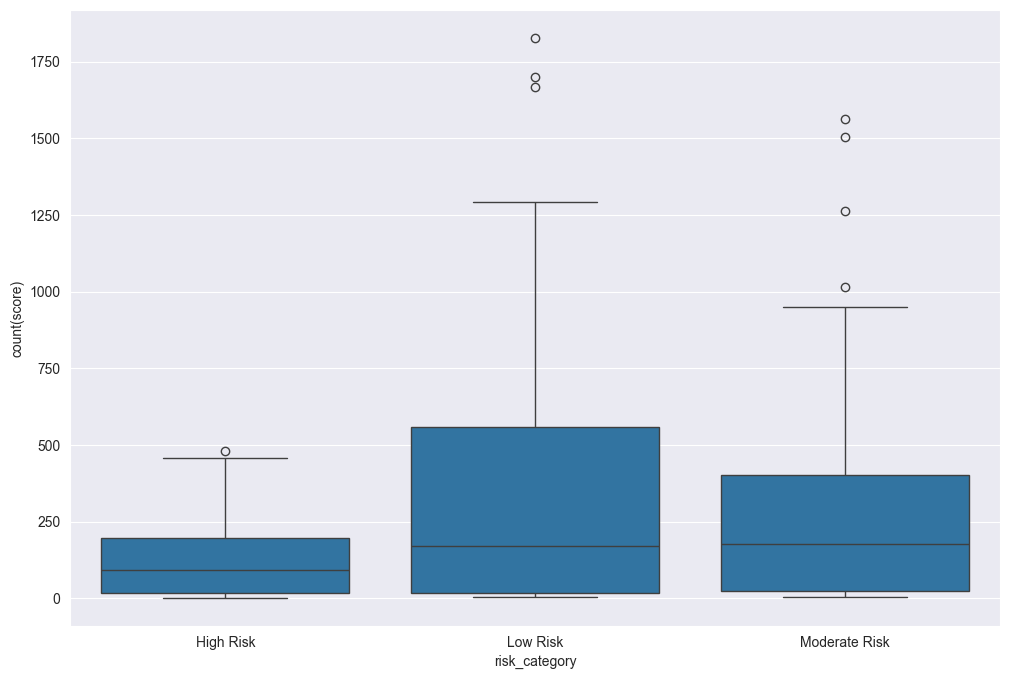

In [109]:
plt.figure(figsize=(12, 8))
plot = sns.boxplot(data=scores_df, x=RISK_CATEGORY, y=COUNT_SCORE)

All risk categories look skewed top. High risk has the smallest median and IQR. low risk and moderate risk have a roughly similar median, but low risk has a larger iqr range compared to moderate risk. low risk has the outlier whisker wider than  all risks, followed by moderate and high. They all have outliers, but moderate has most then low risk then high risk. but these are in respect to their outlier band.

# Part II - Making a Synthetic Dataset

In this part you're going to be create a synthetic dataset (dataframe) with 1000 observations (rows). You are going to use random number generators to create the data for you.

You can use either the numpy or scipy library, whichever you find easier. Be sure to import any libraries you use at the top of the ntoebook (not down here).

In [110]:
n = 10000

In [111]:
#Optional: set random seed for reproducibility (how you do it depends on whether you use numpy or scipy to generate the random numbers)
np.random.seed(n)

2.1) Create a variable "v1" of 10,000 numbers where y = 3x+4 is the value of the element at index x, i.e., [4, 7, 10, ...] (Done for you)

In [112]:
v1 = 3 * np.arange(n) + 4

2.2) Create a list of 10,000 samples from a normal (Gaussian) distribution with mean = 0 and variance = 10.

HINT: Pay attention to whether the argument to your number generator is variance or standard deviation. (It doesn't have to be a python list, it can be an array or dataframe, or whatever dtype is most convenient for you.)

In [113]:
mean = 0
variance = 10
standard_deviation = np.sqrt(variance)
noise = np.random.normal(mean, standard_deviation, n)

2.3) Create a variable v2 = v1 + Gaussian noise, using the noise your created above

In [114]:
v2 = v1 + noise

2.4) Create a variable v3 = exp(v1) that exponentiates the libear variable in v1, also sometimes denoted e^(v1), e.g., v3[0] = e^4

In [115]:
v3 = np.exp(v1)

/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_2383/706569660.py:1: RuntimeWarning: overflow encountered in exp
  v3 = np.exp(v1)


2.5) Create a list v4 = exp(v1) + Gaussian noise, using the same noise variable you created earlier

In [116]:
v4 = v3 + noise

2.6) Create a list v5 = exp(v1 + Gaussian noise), using the same noise variable you created earlier

In [117]:
v5 = np.exp(v2)

/var/folders/2p/bfr58x5j3q7bhsbb77vmqxbw0000gn/T/ipykernel_2383/3036182197.py:1: RuntimeWarning: overflow encountered in exp
  v5 = np.exp(v2)


v3 and v5 have overflows, This is not good, the random numbers that are generated from np.arrange(0,n) are being passed to these functions(v1,v2,v3,v4,v5), where they may to be big to represent. I will come up with a theoretical better values for np.arrange

We know
- v1 = 3x + 4
- v2 = v1 + noise
    - v2 = 3x + 4 + noise
- v5 = e^(v2)
    - v5 = e^(3x + 4 + noise)

to prevent an overflow
- v5 <= float64.max
    - e^(3x + 4 + noise) <= float64.max
        - 3x + (4 + noise) <= ln(float64.max)
        - 3x <= ln(float64.max) - (4 + noise)
        - x <= (ln(float64.max) - (4 + noise) / 3

- Due to the 68-95-99.7 rule
- μ = mean
    - μ = 0
- variance = 10
- σ = standard deviation =
    - σ = sqrt(variance)
        - σ = sqrt(10)
- z = z score
- % of samples
    - confidence interval
        - μ +- zσ

we will use the z score of 3.9 to get 99.995%
- Range
    - lower noise
        - 0 - 3.9 * sqrt(10)
    - upper noise
        - 0 + 3.9 * sqrt(10)

Our stop value in np arrange must be
- stop = x
    - stop =  (ln(float64.max) - (4 + noise) / 3
        - noise must be the upper bound of noise to account of 99.995% of data
    - stop = (ln(float64.max) - (4 + upper_noise) / 3

In [118]:
z_score = 3
upper_noise = mean + (z_score * standard_deviation)
max_float64 = np.finfo(np.float64).max

In [119]:
#scaling stop parameter in np.arrange
stop = ((np.log(max_float64) - (4 + upper_noise)) / 3)
print(stop)
# updating the v1,v2,v3,v4,v5
v1 = 3 * np.arange(start=0, stop=stop, step=stop / n) + 4
v2 = v1 + noise
v3 = np.exp(v1)
v4 = v3 + noise
v5 = np.exp(v2)

232.09862663762627


2.7) Create a dataframe with 10,000 rows and columns = [v1, v2, v3, v4, v5, noise]

In [120]:
V1 = 'v1'
V2 = 'v2'
V3 = 'v3'
V4 = 'v4'
V5 = 'v5'
NOISE = 'noise'
df_full = pd.DataFrame({V1: v1, V2: v2, V3: v3, V4: v4, V5: v5, NOISE: noise})

2.8) For each variable (v2, v3, v4, v5) create a separate scatter plot with v1 on the x-axis. Remark on your general observations.

<Axes: xlabel='v1', ylabel='v2'>

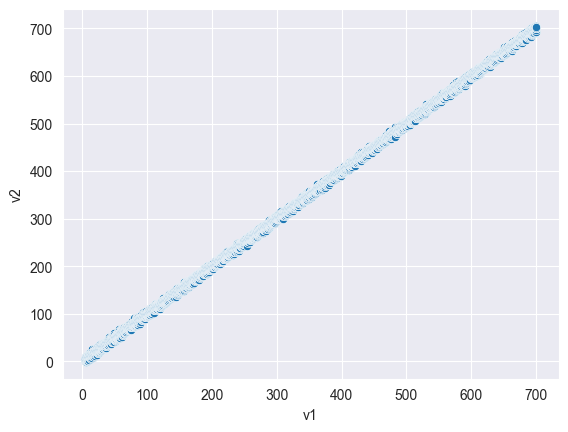

In [121]:
# Code for plots here, and remarks and observations here
sns.scatterplot(data=df_full, x=V1, y=V2)

Will make observation later

<Axes: xlabel='v1', ylabel='v3'>

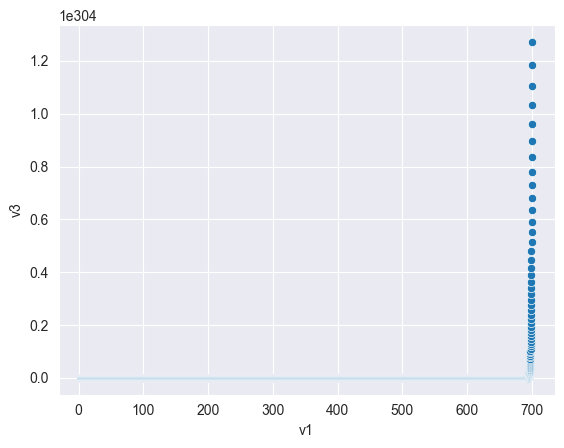

In [122]:
sns.scatterplot(data=df_full, x=V1, y=V3)

Its hard to make an observation since e^1.2e304 is close to float64.max, making the axis large, so i will scale stop down another log().

In [123]:
#scaling stop parameter in np.arrange again
stop = np.log(stop)
# updating the v1,v2,v3,v4,v5
v1 = 3 * np.arange(start=0, stop=stop, step=stop / n) + 4
v2 = v1 + noise
v3 = np.exp(v1)
v4 = v3 + noise
v5 = np.exp(v2)
#updating df full
df_full = pd.DataFrame({V1: v1, V2: v2, V3: v3, V4: v4, V5: v5, NOISE: noise})

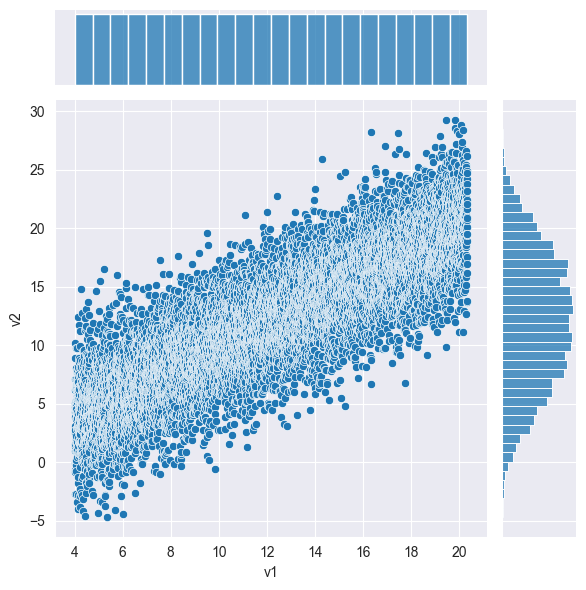

In [124]:
sns.jointplot(data=df_full, x=V1 , y=V2, kind='scatter')

There appears to be a uniform spread across the positive linear pattern and moderate to strong relationship.

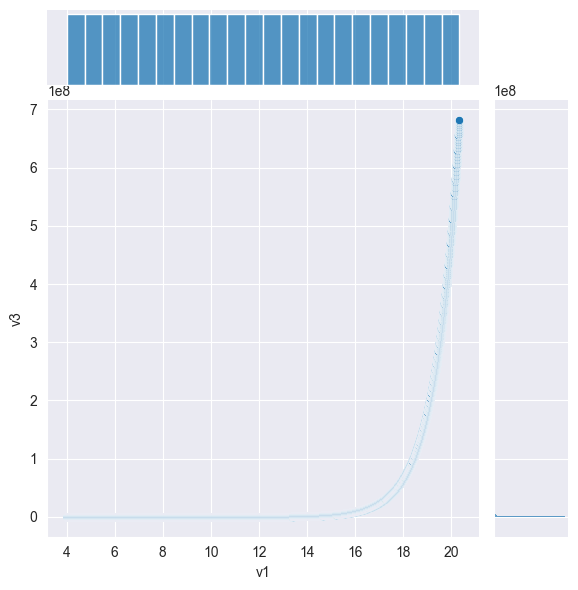

In [125]:
sns.jointplot(data=df_full, x=V1 , y=V3, kind='scatter')

There appears positive exponential trend, but when you look at the where most the density is, trend begins to look slightly constant then skyrockets around (17e8,0e8). there appears to  be a strong relationship as all the points are packed tightly, and the points are spread evenly across 4e8-20e8 according to distribution at the top margin. it looks like +0e8 might be outliers, there arent many points around that area. and lastly the variability is minimal until (16e8 ,0e8)

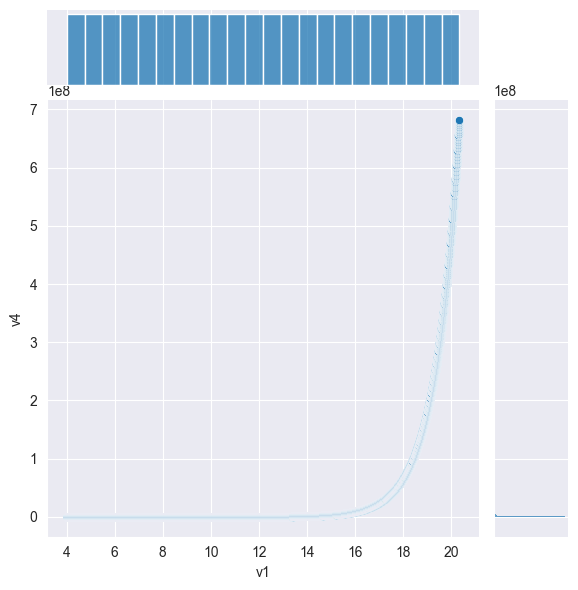

In [126]:
sns.jointplot(data=df_full, x=V1 , y=V4, kind='scatter')

There appears positive exponential trend, but when you look at the where most the density is, trend begins to look slightly constant then skyrockets around (17e8,0e8). there appears to  be a strong relationship as all the points are packed tightly, and the points are spread evenly across 4e8-20e8 according to distribution at the top margin. it looks like +0e8 might be outliers, there arent many points around that area. and lastly the variability is minimal until (16e8 ,0e8)

<Axes: xlabel='v1', ylabel='v5'>

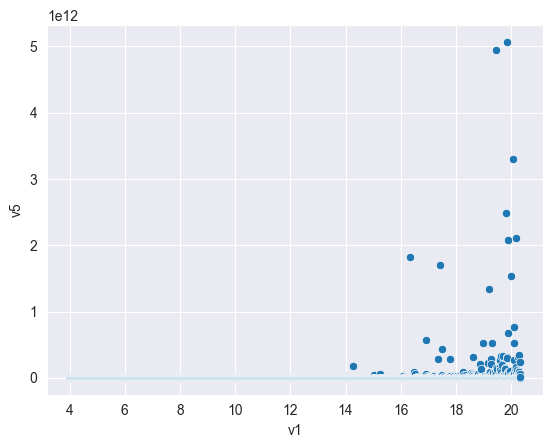

In [127]:
sns.scatterplot(data=df_full, x=V1 , y=V5)

There appears constant  trend, strong relationship as all the points are packed tightly, however the variability starts to increases after 14e12, sort of heteroscedasicity

2.9)  Create pair of boxplots with v4 and v5 next to each other. Remark on how v4 and v5 compare, based on the violin plots and the scatter plots. You may use other plots or tools if helpful.

<Axes: >

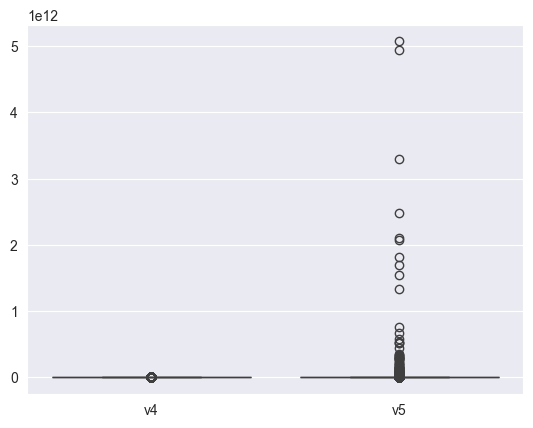

In [128]:
# Pair of boxplots
sns.boxplot(data=df_full[[V4, V5]])

This is hard to interpret so i will log the scale

<Axes: >

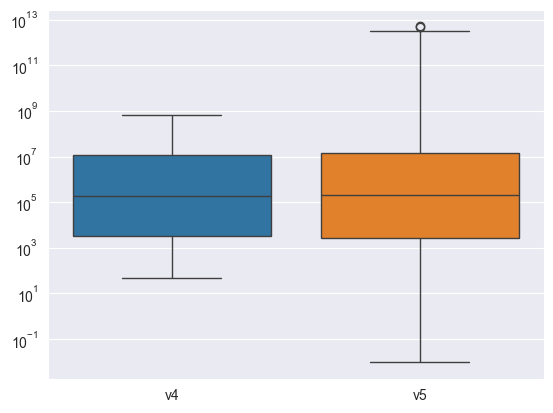

In [129]:
sns.boxplot(data=df_full[[V4, V5]], log_scale=True)

The IQR and mean seem to be roughly the same but with v5 IQR range slightly larger. There are different in a sense that v5 outlier whiskers are way larger or smaller than v4. and v5 has outliers where v4 does not.

<Axes: >

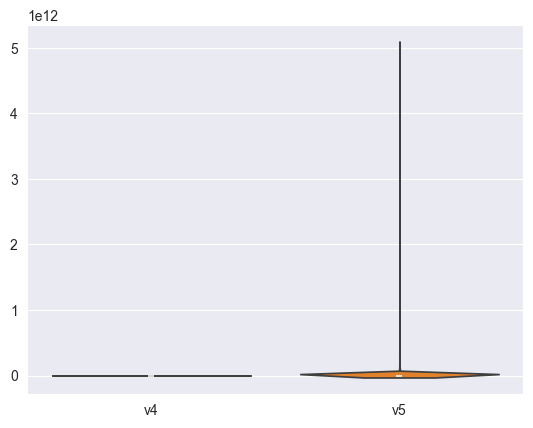

In [130]:
# Violin plots
sns.violinplot(data=df_full[[V4, V5]])

Again hard to interpret will use log scale

<Axes: >

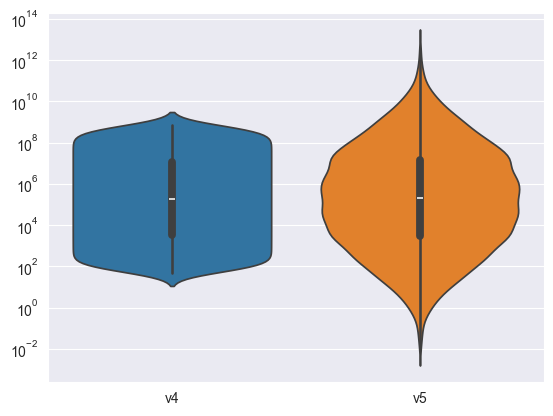

In [131]:
sns.violinplot(data=df_full[[V4, V5]], log_scale=True)

v4 looks more dense than v5 in smaller range, as the outlier whiskers are wider in v5 than v4. they both look symmetric. but v5 has 3 minor modes(bumps)

<Axes: xlabel='v4', ylabel='v5'>

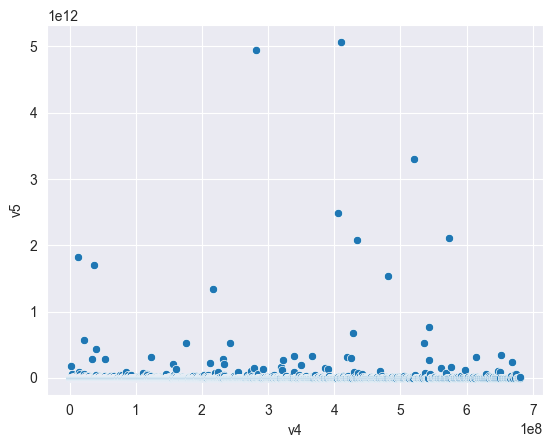

In [132]:
# Scatter plot to see relationship
sns.scatterplot(data=df_full, x=V4, y=V5)

There looks like theres a constant not positive not negative linear trend and somewhat uniform variability.

## Part III - Sampling and Convergence

3.1) Create a variable "pareto" that is a list of 10,000 samples from a Pareto distribution with shape parameter = 1.2 (usually denoted a or alpha). Add this list "pareto" as a column to your dataframe from Part II

In [133]:
alpha = 1.2
pareto = np.random.pareto(a=alpha, size=n)
PARETO = 'pareto'
df_full[PARETO] = pareto
df_full.head()

,v1,v2,v3,v4,v5,noise,pareto
0,4.000000,-0.019542,54.598150,50.578608,0.980648,-4.019542,0.718339
1,4.001634,4.558628,54.687444,55.244439,95.452475,0.556994,1.062391
2,4.003268,3.066550,54.776885,53.840167,21.467708,-0.936718,0.184718
3,4.004902,5.038742,54.866472,55.900311,154.275835,1.033840,0.457977
4,4.006537,0.928314,54.956205,51.877982,2.530240,-3.078222,0.318868


3.2) Add two more columns to your dataframe labeled "running_avg_normal" and "running_avg_pareto". In the "running_avg_normal" column put the running average of the (unsorted) values in the noise column. For example, if the values in the noise column are [0.1, 0.3, 0.5, ...] then the running average should be [0.1, 0.2, 0.3, ...]. Do the same for the Pareto column.

HINT: Check out the .expanding() and .mean() methods for pandas Series objects

In [134]:
RUNNING_AVG_NORMAL = 'running_avg_normal'
RUNNING_AVG_PARETO = 'running_avg_pareto'
df_full[RUNNING_AVG_NORMAL] = df_full[NOISE].sort_values(ascending=False).expanding().mean()
df_full[RUNNING_AVG_PARETO] = df_full[PARETO].sort_values(ascending=False).expanding().mean()
df_full.head()

,v1,v2,v3,v4,v5,noise,pareto,running_avg_normal,running_avg_pareto
0,4.000000,-0.019542,54.598150,50.578608,0.980648,-4.019542,0.718339,0.604106,9.152165
1,4.001634,4.558628,54.687444,55.244439,95.452475,0.556994,1.062391,2.849803,11.139546
2,4.003268,3.066550,54.776885,53.840167,21.467708,-0.936718,0.184718,1.929728,6.012891
3,4.004902,5.038742,54.866472,55.900311,154.275835,1.033840,0.457977,3.173568,7.623982
4,4.006537,0.928314,54.956205,51.877982,2.530240,-3.078222,0.318868,0.900542,6.833626


3.3) Create a lineplot for running_avg_normal and a lineplot for running_avg_Pareto. Remark on your observations.

<Axes: xlabel='running_avg_normal', ylabel='running_avg_pareto'>

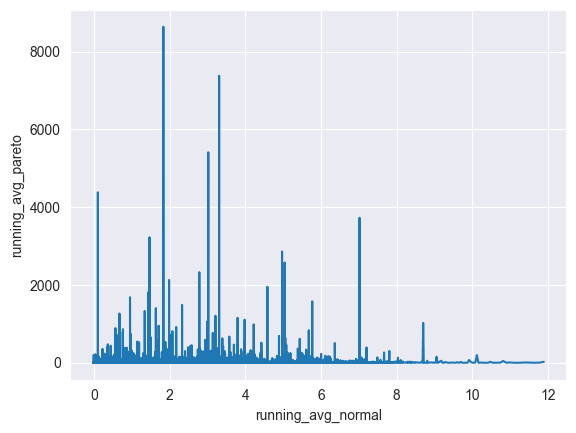

In [135]:
sns.lineplot(data=df_full, x=RUNNING_AVG_NORMAL, y=RUNNING_AVG_PARETO)

There's overall a downwards trend, with the roughly 3 growth spikes of and that lines apart to be connected, signaling continuity